In [0]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Check for working directory
#Run this on terminal if working from local machine
!ls

'Covid-19 SG Lagged.xlsx'   Covid_sg_selfpractice.ipynb
'Covid-19 SG.xlsx'	    sg_covid19_data.txt


In [0]:
#Setting Workign Directory 
%cd /content/drive/My\ Drive/Colab\ Notebooks/covid

/content/drive/My Drive/Colab Notebooks/covid


In [0]:
#Required external package for finance data
pip install yfinance

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Library for Finance Data
import yfinance as yf

In [0]:
#Set the Ticker here
ticker = "^STI"
yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-12-28,824.400024,824.400024,824.400024,824.400024,824.400024,0
1987-12-29,810.900024,810.900024,810.900024,810.900024,810.900024,0
1987-12-30,823.200012,823.200012,823.200012,823.200012,823.200012,0
1988-01-04,833.599976,833.599976,833.599976,833.599976,833.599976,0
1988-01-05,879.299988,879.299988,879.299988,879.299988,879.299988,0
...,...,...,...,...,...,...
2020-04-21,2591.979980,2601.149902,2551.919922,2551.919922,2551.919922,351561100
2020-04-22,2530.969971,2556.050049,2507.830078,2550.040039,2550.040039,351932200
2020-04-23,2549.870117,2563.120117,2539.840088,2542.370117,2542.370117,263707100


In [0]:
#Predetermine the time range
newtime = yf.download(ticker, start = "2020-01-01", end = "2020-04-26")

[*********************100%***********************]  1 of 1 completed


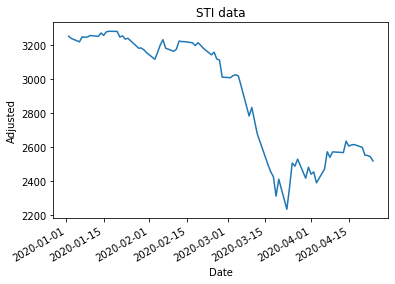

In [0]:
import matplotlib.pyplot as plt
newtime['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("STI data")
#plt.style.use('dark_background')
plt.show()

In [0]:
#Start calculating the index
#What we want to see, is the daily delta between the close of the previous day and the open of the next day. 
newtime.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-20,2622.669922,2627.560059,2592.949951,2597.850098,2597.850098,244908500
2020-04-21,2591.979980,2601.149902,2551.919922,2551.919922,2551.919922,351561100
2020-04-22,2530.969971,2556.050049,2507.830078,2550.040039,2550.040039,351932200
2020-04-23,2549.870117,2563.120117,2539.840088,2542.370117,2542.370117,263707100
2020-04-24,2530.030029,2533.750000,2501.580078,2518.159912,2518.159912,299499900


In [0]:
# Creating a Delta function which measures
# "TO" means today's open, "YC" means yesterday's close. Trying to find the difference 
newtime['Delta_TO_YC'] = newtime['Open'] - newtime['Close'].shift(+1)
newtime.tail(20)

,Open,High,Low,Close,Adj Close,Volume,Delta_TO_YC
Date,,,,,,,
2020-03-27,2545.639893,2561.370117,2511.209961,2528.760010,2528.760010,487699200,58.079834
2020-03-30,2479.979980,2480.449951,2409.689941,2416.239990,2416.239990,403297900,-48.780029
2020-03-31,2454.169922,2487.649902,2454.169922,2481.229980,2481.229980,511031400,37.929932
2020-04-01,2468.169922,2481.439941,2419.100098,2440.270020,2440.270020,363877000,-13.060059
2020-04-02,2402.429932,2453.810059,2390.879883,2453.030029,2453.030029,405555200,-37.840088
2020-04-03,2451.469971,2454.790039,2380.840088,2389.290039,2389.290039,456374200,-1.560059
2020-04-06,2429.580078,2477.310059,2411.270020,2470.590088,2470.590088,384427200,40.290039
2020-04-07,2506.250000,2571.889893,2502.330078,2571.889893,2571.889893,492081200,35.659912
2020-04-08,2528.310059,2551.649902,2507.129883,2539.439941,2539.439941,318915900,-43.579834


In [0]:
# Check the working directory again, here I loaded the manually adjusted lagged data on the excel sheet. 
# The theory behind adjusting for T+1 Lag, is because I believe that the day reported cases, at time varies should impact the following day prices
!ls

'Covid-19 SG Lagged.xlsx'   Covid_sg_selfpractice.ipynb
'Covid-19 SG.xlsx'	    sg_covid19_data.txt


In [0]:
# Instead of starting at 23, now we start at 24 Jan
covidsg = pd.read_excel('Covid-19 SG Lagged.xlsx', index_col=0)

In [0]:
covidsg.tail(5)

,Daily Confirmed,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,Tested positive demise,Daily Imported,Daily Local transmission,Local cases residing in dorms MOH report,Local cases not residing in doms MOH report,Intensive Care Unit (ICU),General Wards MOH report,In Isolation MOH report,Total Completed Isolation MOH report,Total Hospital Discharged MOH report,roc_confirmedcases,roc_dailyimported,roc_ICU
Date,,,,,,,,,,,,,,,,,,,,,,
2020-04-23,1016,10141,57,0,900,4999,4230,1,12,0,0,1016,967.0,49.0,25,1571.0,7651.0,413.0,469.0,-8.550855,0.0,-7.407407
2020-04-24,1037,11178,36,1,936,8874,1356,0,12,0,0,1037,982.0,55.0,26,1342.0,8880.0,434.0,484.0,2.066929,0.0,4.000000
2020-04-25,897,12075,38,0,974,9878,1211,0,12,0,0,897,852.0,45.0,24,1205.0,9878.0,449.0,507.0,-13.500482,0.0,-7.692308
2020-04-26,618,12693,46,0,1020,10465,1196,0,12,0,0,618,597.0,21.0,24,1190.0,10465.0,474.0,528.0,-31.103679,0.0,0.000000
2020-04-27,931,13624,58,0,1078,11241,1293,0,12,0,2,929,886.0,43.0,22,1289.0,11241.0,514.0,546.0,50.647249,0.0,-8.333333


In [0]:
#just printing the column headers in the dataframe
for col in covidsg.columns: 
    print(col)

Daily Confirmed 
Cumulative Confirmed
Daily Discharged
Passed but not due to COVID
Cumulative Discharged
Discharged to Isolation
Still Hospitalised
Daily Deaths
Cumulative Deaths
Tested positive demise
Daily Imported
Daily Local transmission
Local cases residing in dorms MOH report
Local cases not residing in doms MOH report
Intensive Care Unit (ICU)
General Wards MOH report
In Isolation MOH report
Total Completed Isolation MOH report
Total Hospital Discharged MOH report
roc_confirmedcases
roc_dailyimported
roc_ICU


In [0]:
###now we want to calculate the various rate of changes of by adding a new column
##Daily confirm - yesterady daily confirm 
covidsg['roc_confirmedcases'] = ((covidsg.iloc[:, 0]-covidsg.iloc[:, 0].shift(+1))/covidsg.iloc[:, 0].shift(+1)) * 100 

##Daily daily imported - yesterady daily imported 
covidsg['roc_dailyimported'] = ((covidsg['Daily Imported']-covidsg['Daily Imported'].shift(+1))/covidsg['Daily Imported'].shift(+1)) * 100 

##Daily ICU - yesterday daily ICU
covidsg['roc_ICU'] = ((covidsg['Intensive Care Unit (ICU)']-covidsg['Intensive Care Unit (ICU)'].shift(+1))/covidsg['Intensive Care Unit (ICU)'].shift(+1)) * 100 

#covidsg['roc_dormcases'] = covidsg['']
#covidsg['roc_dormcases'] = covidsg['']
#covidsg['roc_dailyimported']
#covidsg['roc_dailylocaltransmited']

##Cleaning columns
#Removing inf
covidsg['roc_confirmedcases'] = covidsg['roc_confirmedcases'].replace([np.inf, -np.inf], np.nan)
covidsg['roc_ICU'] = covidsg['roc_ICU'].replace([np.inf, -np.inf], np.nan)
covidsg['roc_dailyimported'] = covidsg['roc_dailyimported'].replace([np.inf, -np.inf], np.nan)
#convert 
covidsg['roc_confirmedcases'] = covidsg['roc_confirmedcases'].fillna(0)
covidsg['roc_ICU'] = covidsg['roc_ICU'].fillna(0)
covidsg['roc_dailyimported'] = covidsg['roc_dailyimported'].fillna(0)

covidsg.tail(20)


In [0]:
#Joining the two datasets
result = pd.concat([covidsg, newtime], axis=1).reindex(covidsg.index)
#result2 = result.drop(columns=['Passed but not due to COVID'])

In [0]:
print(result.tail())

            Daily Confirmed   Cumulative Confirmed  ...       Volume  Delta_TO_YC
Date                                                ...                          
2020-04-23            1016.0               10141.0  ...  263707100.0    -0.169922
2020-04-24            1037.0               11178.0  ...  299499900.0   -12.340088
2020-04-25             897.0               12075.0  ...          NaN          NaN
2020-04-26             618.0               12693.0  ...          NaN          NaN
2020-04-27             931.0               13624.0  ...          NaN          NaN

[5 rows x 29 columns]


In [0]:
#just printing the column headers in the dataframe
for col in result.columns: 
    print(col)

Daily Confirmed 
Cumulative Confirmed
Daily Discharged
Passed but not due to COVID
Cumulative Discharged
Discharged to Isolation
Still Hospitalised
Daily Deaths
Cumulative Deaths
Tested positive demise
Daily Imported
Daily Local transmission
Local cases residing in dorms MOH report
Local cases not residing in doms MOH report
Intensive Care Unit (ICU)
General Wards MOH report
In Isolation MOH report
Total Completed Isolation MOH report
Total Hospital Discharged MOH report
roc_confirmedcases
roc_dailyimported
roc_ICU
Open
High
Low
Close
Adj Close
Volume
Delta_TO_YC


Date
2020-01-24    3240.020020
2020-01-25    3225.327515
2020-01-26    3210.635010
2020-01-27    3195.942505
2020-01-28    3181.250000
2020-01-29    3182.570068
2020-01-30    3170.679932
2020-01-31    3153.729980
2020-02-01    3141.256673
2020-02-02    3128.783366
Name: Adj Close, dtype: float64


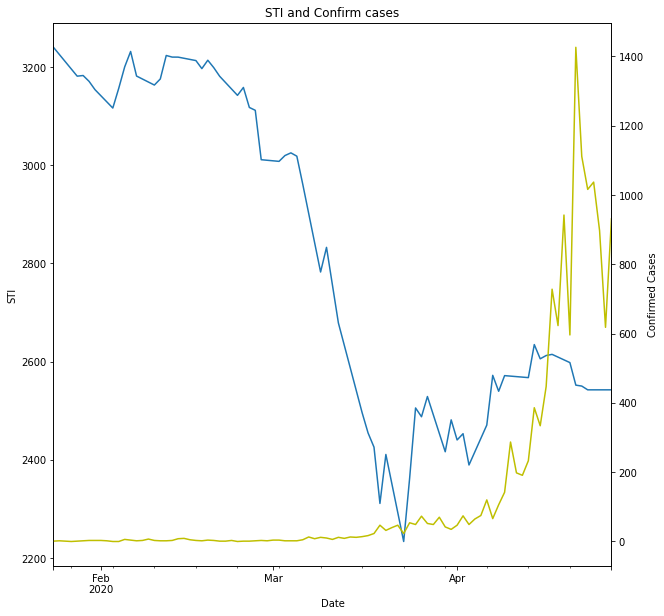

In [0]:
#Create combo chart STI vs Covid Confirmed Cases (same time range)

#fill blank spaces when STI has no data over weekend or PH and 
result3 = result['Adj Close'].interpolate(method='time')
print (result3.head(10))

#plot STI on primary axis
plt.figure(figsize=(10,10))
result3.plot() 
plt.ylabel("STI")

#Plot confirmed cases on secondary axis
result.iloc[:, 0].plot(color='y', secondary_y=True)
#result.iloc[:, 0].plot() 
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("STI and Confirm cases")
plt.show()

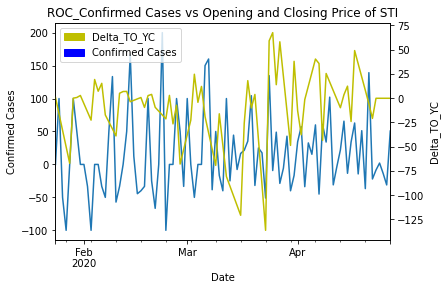

In [0]:
#Now we want to calculate the Rate of Change (ROC) of confirmed cases by adding a new column

#Removing inf
covidsg['roc_confirmedcases'] = covidsg['roc_confirmedcases'].replace([np.inf, -np.inf], np.nan)
#convert 
covidsg['roc_confirmedcases'] = covidsg['roc_confirmedcases'].fillna(0)

covidsg.tail(50)

#Create combo chart ROC_Confirmed Cases vs Opening and Closing Price of STI (same time range)
plt.title("ROC_Confirmed Cases vs Opening and Closing Price of STI")


#plot STI on primary axis
result['roc_confirmedcases'].plot() 
plt.ylabel("Confirmed Cases")

#Plot confirmed cases on secondary axis

result4 = result['Delta_TO_YC'].interpolate(method='time')
result4.plot(color='y', secondary_y=True)
#result.iloc[:, 0].plot() 
plt.xlabel("Date")
plt.ylabel("Delta_TO_YC")

yellow_patch = mpatches.Patch(color='y', label='Delta_TO_YC')
blue_patch = mpatches.Patch(color='b', label='Confirmed Cases')
plt.legend(handles=[yellow_patch,blue_patch])

plt.show()

In [0]:
result.shape

(95, 29)

In [0]:
 #finding Corr Plot between all the variables
result4 = result[['roc_confirmedcases','roc_ICU','roc_dailyimported','Delta_TO_YC']]
result4.head()
result4.corr()


,roc_confirmedcases,roc_ICU,roc_dailyimported,Delta_TO_YC
roc_confirmedcases,1.000000,0.148542,0.439812,0.033626
roc_ICU,0.148542,1.000000,0.113061,-0.019585
roc_dailyimported,0.439812,0.113061,1.000000,0.012048
Delta_TO_YC,0.033626,-0.019585,0.012048,1.000000


Text(0.5, 1.0, 'STI(ES3.SI)(Start 24 Jan) vs SG COVID (Start 23 Jan); 23 Jan to 24 Apr 2020')

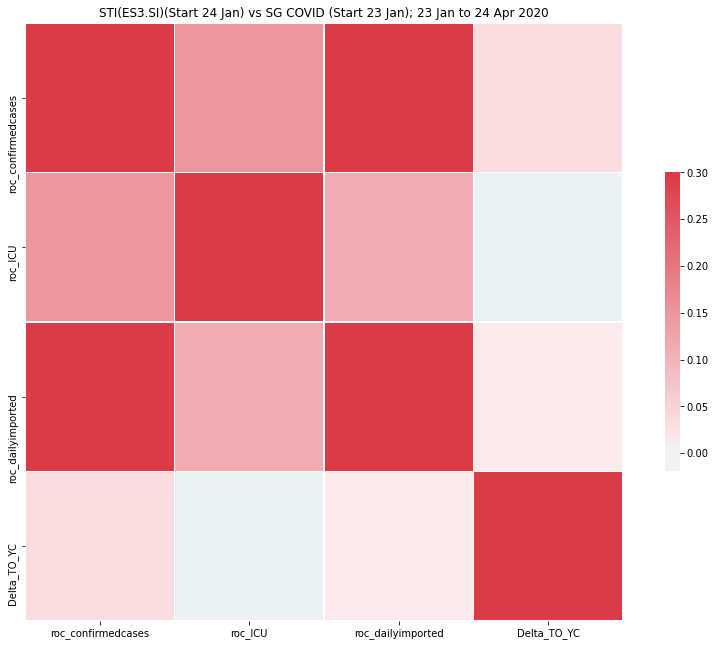

In [0]:
# Compute the correlation matrix
corr = result4.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Including the title
plt.title("STI(ES3.SI)(Start 24 Jan) vs SG COVID (Start 23 Jan); 23 Jan to 24 Apr 2020" )



In [0]:
covidsg.shape

In [0]:
covidsg.reset_index(inplace = True) 

In [0]:
covidsg.head()

In [0]:
#+1 Day for covid 19 data, as the day's reporting will affect index data for the next day
covidsg['newdate'] = pd.to_datetime(covidsg['Date']).apply(pd.DateOffset(1))

In [0]:
covidsg.head()